# Convolutional Neural Network on MNIST Grayscale
### By Tomas Ward
Building a convolutional neural network (CNN) to classify digits from the grayscale MNIST dataset.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Add, Input, Activation
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

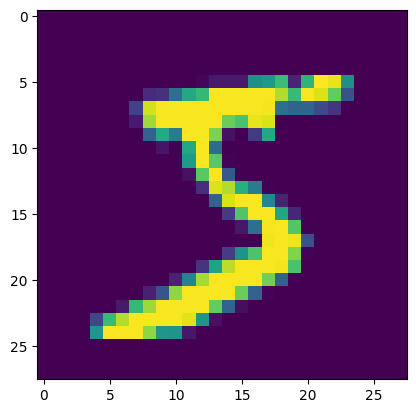

In [2]:
# Load data
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()
plt.imshow(mnist_x_train[0])

# Reshape the data to make it suitable for a CNN (# images, image size in pixels (x), image size in pixels (y), # channels)
trainX = mnist_x_train.reshape((mnist_x_train.shape[0], 28, 28, 1 )) / 255
testX = mnist_x_test.reshape((mnist_x_test.shape[0], 28, 28, 1)) / 255

In [3]:
# Data Processing: One hot encode the labels
mnist_y_train = to_categorical(mnist_y_train, num_classes=10)
mnist_y_test = to_categorical(mnist_y_test, num_classes=10)

In [4]:
def residual_block(x, filters, kernel_size=3):
    shortcut = x 

    x = Conv2D(filters, kernel_size=kernel_size, padding="same", activation='relu')(x)
    x = Conv2D(filters, kernel_size=kernel_size, padding="same")(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    
    return x

In [5]:
# Define input layer
input_layer = Input(shape=(28, 28, 1))

# First convolutional layer (fewer filters to optimize speed)
x = Conv2D(16, (5, 5), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)  # Downsampling

# Second convolutional layer with residual block
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = residual_block(x, filters=32)  # Adding residual block
x = MaxPooling2D((2, 2))(x)  # Downsampling

# Optional third convolutional block (can be skipped to simplify further)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)  # Downsampling

# Flatten and Dense layers for classification
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)  # Increase dropout for regularization

# Output layer with 10 classes for MNIST
output_layer = Dense(10, activation='softmax')(x)

# Create the model
cnn_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with a lower learning rate for stability
optimizer = Adam(learning_rate=0.001)
cnn_model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Display model summary
cnn_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 28, 28,    │        416 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 14, 14,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 14, 14,    │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 14, 14,    │      9,248 │ conv2d_1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 14, 14,    │      9,248 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 14, 14,    │          0 │ conv2d_3[0][0],   │
│                     │ 32)               │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 14, 14,    │          0 │ add[0][0]         │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 7, 7, 32)  │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 7, 7, 64)  │     18,496 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 3, 3, 64)  │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 576)       │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │     36,928 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10)        │        650 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 79,626 (311.04 KB)

 Trainable params: 79,626 (311.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Plot Losses callback
import matplotlib.pyplot as plt
from IPython.display import clear_output
import keras


class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get("loss"))
        self.val_losses.append(logs.get("val_loss"))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val-loss")
        plt.legend()
        plt.show()


plot_losses = PlotLosses()

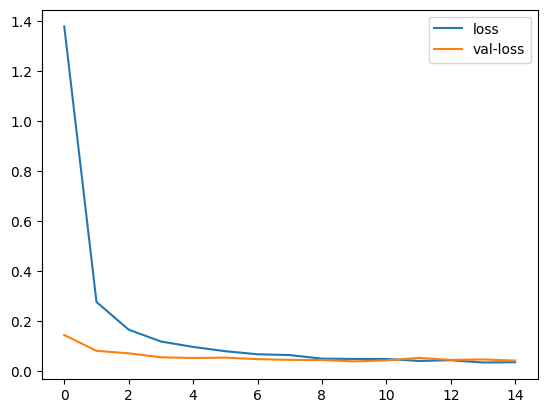

375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9895 - loss: 0.0345 - val_accuracy: 0.9893 - val_loss: 0.0434


In [7]:
from tensorflow.keras.callbacks import EarlyStopping

# Fit the model, plotting the loss in real time
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = cnn_model.fit(np.array(mnist_x_train), np.array(mnist_y_train), 
                        epochs=20,
                        validation_split = 0.2,
                        batch_size=128,
                        callbacks=[plot_losses, early_stopping])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


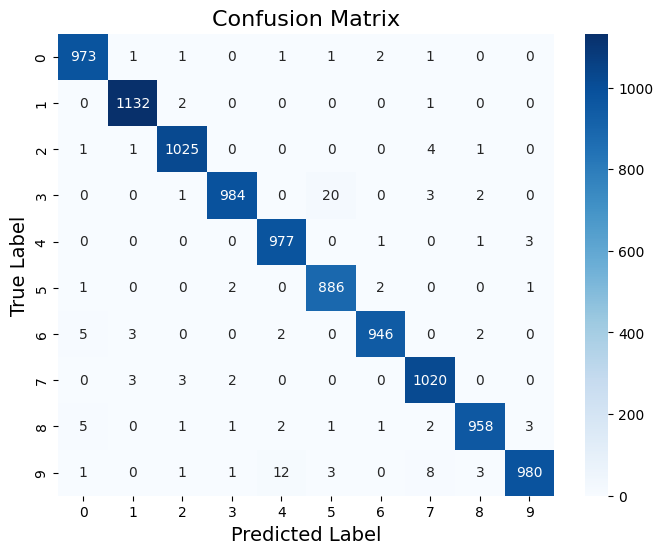

In [11]:
# Evaluate the model with the test set
pred_y=cnn_model.predict(np.array(mnist_x_test))
pred_y=pred_y = np.argmax(pred_y, axis=1)
mnist_y_test_original = np.argmax(mnist_y_test, axis=1)

# Compute the confusion matrix to monitor model performance
m = confusion_matrix(mnist_y_test_original, pred_y)


plt.figure(figsize=(8, 6))
sns.heatmap(m, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

In [13]:
metrics = cnn_model.evaluate(np.array(mnist_x_test), np.array(mnist_y_test))

print(f"Loss: {round(metrics[0],2)}")
print(f"Accuracy: {round(metrics[1] * 100, 2)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9856 - loss: 0.0486
Loss: 0.04
Accuracy: 98.81%


## Random image reader
This codeblock picks a random image from the MNIST Grayscale test set and runs it through the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


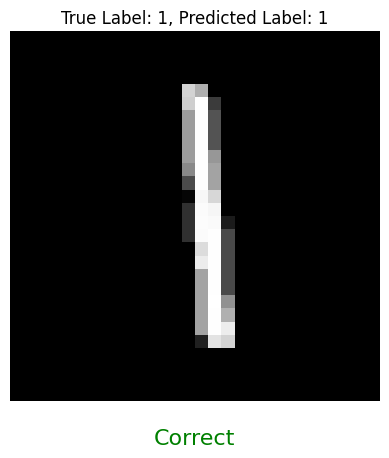

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Pick a random index from the MNIST test set
random_index = random.randint(0, mnist_x_test.shape[0] - 1)
random_image = mnist_x_test[random_index]
true_label = np.argmax(mnist_y_test[random_index])  # Convert one-hot to label


random_image_input = np.expand_dims(random_image, axis=0) 

# Run the model prediction
predicted_probs = cnn_model.predict(random_image_input)
predicted_label = np.argmax(predicted_probs, axis=1)[0]


is_correct = (true_label == predicted_label)

# Display the image
plt.imshow(random_image.squeeze(), cmap='gray')  # Remove channel dimension for display
color = 'green' if is_correct else 'red'
status_text = 'Correct' if is_correct else 'Incorrect'
plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
plt.text(0.5, -0.1, status_text, ha='center', va='center', fontsize=16, color=color, transform=plt.gca().transAxes)
plt.axis('off') 
plt.show()


# Results Comparison
## FNN vs CNN
The fastest model to trian is the simple FNN, because it has to process less information.

However, the most accurate results come from the CNN as it is able to correctly identify spatial features of the image, not only numerical, with feature extraction and convolutional operations.

Residual blocks allow for more generalization in the depth of the network, making results more reliable.